In [84]:
import os 
import pandas as pd
import csv
import numpy as np
import json
import requests as req
import matplotlib.pyplot as plt
import openweathermapy.core as ow
import time 
import random
from citipy import citipy

In [71]:

# lat and lon variables * Lat and lon can be generated with 2 min/max values but the decimal values make it more precise/// also in the case of this exercise it seems that you need to start with lat/lon data before 
# random city data. My initial approach for getting random.sample city data using citipy was not working

lat = list(np.arange(-90, 90.01, 0.01))
lon = list(np.arange(-180, 180.01, 0.01))

# get random lat and lon 

lat_ran_samp = random.sample(lat, 1000)
lon_ran_samp = random.sample(lon, 1000)


In [72]:
# create database for lat, lon *** Tried making DF with empty columns for city data, but only got errors. 
# Conclusion: intital DF needs data, so don't try to cut corners *** 

cities_df = pd.DataFrame({"Latitude": lat_ran_samp, "Longitude": lon_ran_samp})
cities_df.head()

,Latitude,Longitude
0,0.88,-12.32
1,-74.94,-87.39
2,37.64,-100.84
3,-1.64,96.33
4,65.10,-99.13


In [73]:
# create columns for cities ** Note: be sure to also include "country", because "city" alone only gives vague data 

cities_df["City"] = ""
cities_df["Country"] = ""


In [74]:
# find city and country for lat and lon data /// 

for index, row in cities_df.iterrows(): 
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(index, "City", city.city_name)
    cities_df.set_value(index, "Country", city.country_code)  

cities_df=cities_df.drop_duplicates(["City"], keep='first')        
cities_df.head()

,Latitude,Longitude,City,Country
0,0.88,-12.32,buchanan,lr
1,-74.94,-87.39,punta arenas,cl
2,37.64,-100.84,garden city,us
3,-1.64,96.33,padang,id
4,65.10,-99.13,thompson,ca


In [75]:
# Openweather API call /// 

# Create API settings and store keys 
api_key = "9ab33afcfca2ec3d291dbc05ddc722ca"
settings = {"units":"imperial", "appid": api_key}
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# 'http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q='
complete_query_url = "http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q="

In [76]:
cities_df["Temperature"] = ""
cities_df["Humidity"] = ""
cities_df["Clouds"] = ""
cities_df["Wind"] = ""

SleepCounter = 0
PullCounter = 0
BatchCounter = 1

### Loop through the APIs to construct new columns in DF --- refer to "scrap files for 
# alternatibve methods of performing this request. This appears to be the best method.

for index, row in cities_df.iterrows():
    try:
        query = complete_query_url + row["City"].replace(" ","+") + "," + row["Country"]
        get = req.get(query)
        owjson = get.json()
        cities_df.set_value(index, "Temperature", owjson["main"]["temp"])
        cities_df.set_value(index, "Humidity", owjson["main"]["humidity"])
        cities_df.set_value(index, "Clouds", owjson["clouds"]["all"])
        cities_df.set_value(index, "Wind", owjson["wind"]["speed"])
    except:
        cities_df.set_value(index, "Temperature", "FAIL")
    
    PullCounter += 1
    
    SleepCounter += 1
    
    # If loop to ensure not overloading the weather API
    if SleepCounter == 50:
        print("~~~ sleep ~~~")
        time.sleep(10)
        print("")
        SleepCounter = 0
        BatchCounter += 1
    
    # Printing API link
    print("----- begin request -----")
    print("Processing Record " + str(PullCounter) + " of Set " + str(BatchCounter) +" | " + row["City"])
    print(query)
    print("--- request complete ---")

----- begin request -----
Processing Record 1 of Set 1 | buchanan
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=buchanan,lr
--- request complete ---
----- begin request -----
Processing Record 2 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=punta+arenas,cl
--- request complete ---
----- begin request -----
Processing Record 3 of Set 1 | garden city
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=garden+city,us
--- request complete ---
----- begin request -----
Processing Record 4 of Set 1 | padang
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=padang,id
--- request complete ---
----- begin request -----
Processing Record 5 of Set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial

----- begin request -----
Processing Record 41 of Set 1 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=la+ronge,ca
--- request complete ---
----- begin request -----
Processing Record 42 of Set 1 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=vaitupu,wf
--- request complete ---
----- begin request -----
Processing Record 43 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=mataura,pf
--- request complete ---
----- begin request -----
Processing Record 44 of Set 1 | sabla
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=sabla,bg
--- request complete ---
----- begin request -----
Processing Record 45 of Set 1 | porto walter
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=porto+wa

----- begin request -----
Processing Record 81 of Set 2 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=chokurdakh,ru
--- request complete ---
----- begin request -----
Processing Record 82 of Set 2 | wahran
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=wahran,dz
--- request complete ---
----- begin request -----
Processing Record 83 of Set 2 | ovsyanka
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=ovsyanka,ru
--- request complete ---
----- begin request -----
Processing Record 84 of Set 2 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=arraial+do+cabo,br
--- request complete ---
----- begin request -----
Processing Record 85 of Set 2 | waingapu
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units

----- begin request -----
Processing Record 121 of Set 3 | atambua
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=atambua,id
--- request complete ---
----- begin request -----
Processing Record 122 of Set 3 | lolua
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=lolua,tv
--- request complete ---
----- begin request -----
Processing Record 123 of Set 3 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=saint+george,bm
--- request complete ---
----- begin request -----
Processing Record 124 of Set 3 | caldwell
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=caldwell,us
--- request complete ---
----- begin request -----
Processing Record 125 of Set 3 | channel-port aux basques
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722c

----- begin request -----
Processing Record 161 of Set 4 | aksarka
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=aksarka,ru
--- request complete ---
----- begin request -----
Processing Record 162 of Set 4 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=sitka,us
--- request complete ---
----- begin request -----
Processing Record 163 of Set 4 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=nanortalik,gl
--- request complete ---
----- begin request -----
Processing Record 164 of Set 4 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=half+moon+bay,us
--- request complete ---
----- begin request -----
Processing Record 165 of Set 4 | cheney
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=impe

----- begin request -----
Processing Record 201 of Set 5 | sundumbili
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=sundumbili,za
--- request complete ---
----- begin request -----
Processing Record 202 of Set 5 | harper
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=harper,lr
--- request complete ---
----- begin request -----
Processing Record 203 of Set 5 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=comodoro+rivadavia,ar
--- request complete ---
----- begin request -----
Processing Record 204 of Set 5 | auki
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=auki,sb
--- request complete ---
----- begin request -----
Processing Record 205 of Set 5 | visnes
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&unit

----- begin request -----
Processing Record 240 of Set 5 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=umzimvubu,za
--- request complete ---
----- begin request -----
Processing Record 241 of Set 5 | polyarnyy
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=polyarnyy,ru
--- request complete ---
----- begin request -----
Processing Record 242 of Set 5 | monterey
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=monterey,us
--- request complete ---
----- begin request -----
Processing Record 243 of Set 5 | umm lajj
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=umm+lajj,sa
--- request complete ---
----- begin request -----
Processing Record 244 of Set 5 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imp

----- begin request -----
Processing Record 280 of Set 6 | gurskoye
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=gurskoye,ru
--- request complete ---
----- begin request -----
Processing Record 281 of Set 6 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=bandarbeyla,so
--- request complete ---
----- begin request -----
Processing Record 282 of Set 6 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=srednekolymsk,ru
--- request complete ---
----- begin request -----
Processing Record 283 of Set 6 | washougal
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=washougal,us
--- request complete ---
----- begin request -----
Processing Record 284 of Set 6 | bud
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&u

----- begin request -----
Processing Record 319 of Set 7 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=sinnamary,gf
--- request complete ---
----- begin request -----
Processing Record 320 of Set 7 | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=coquimbo,cl
--- request complete ---
----- begin request -----
Processing Record 321 of Set 7 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=rio+gallegos,ar
--- request complete ---
----- begin request -----
Processing Record 322 of Set 7 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=hofn,is
--- request complete ---
----- begin request -----
Processing Record 323 of Set 7 | shirpur
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperia

----- begin request -----
Processing Record 359 of Set 8 | montlucon
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=montlucon,fr
--- request complete ---
----- begin request -----
Processing Record 360 of Set 8 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=bathsheba,bb
--- request complete ---
----- begin request -----
Processing Record 361 of Set 8 | izvoarele
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=izvoarele,ro
--- request complete ---
----- begin request -----
Processing Record 362 of Set 8 | pimentel
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=pimentel,pe
--- request complete ---
----- begin request -----
Processing Record 363 of Set 8 | rudnyy
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=impe

----- begin request -----
Processing Record 399 of Set 8 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=mys+shmidta,ru
--- request complete ---
~~~ sleep ~~~

----- begin request -----
Processing Record 400 of Set 9 | brae
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=brae,gb
--- request complete ---
----- begin request -----
Processing Record 401 of Set 9 | bitanhuan
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=bitanhuan,ph
--- request complete ---
----- begin request -----
Processing Record 402 of Set 9 | blagoyevo
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=blagoyevo,ru
--- request complete ---
----- begin request -----
Processing Record 403 of Set 9 | jauharabad
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc7

----- begin request -----
Processing Record 439 of Set 9 | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=yar-sale,ru
--- request complete ---
----- begin request -----
Processing Record 440 of Set 9 | algiers
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=algiers,dz
--- request complete ---
----- begin request -----
Processing Record 441 of Set 9 | winsum
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=winsum,nl
--- request complete ---
----- begin request -----
Processing Record 442 of Set 9 | kerki
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=kerki,tm
--- request complete ---
----- begin request -----
Processing Record 443 of Set 9 | strezhevoy
http://api.openweathermap.org/data/2.5/weather?appid=9ab33afcfca2ec3d291dbc05ddc722ca&units=imperial&q=strezhe

In [78]:
# remove rows without data 
summary_df = cities_df.loc[cities_df["Temperature"] != "FAIL", :]
print(summary_df.count())
summary_df.head()

Latitude       396
Longitude      396
City           396
Country        396
Temperature    396
Humidity       396
Clouds         396
Wind           396
dtype: int64


,Latitude,Longitude,City,Country,Temperature,Humidity,Clouds,Wind
0,0.88,-12.32,buchanan,lr,77,88,75,6.31
1,-74.94,-87.39,punta arenas,cl,53.6,62,40,25.28
2,37.64,-100.84,garden city,us,48.65,81,90,2.39
3,-1.64,96.33,padang,id,79.57,100,44,1.95
4,65.10,-99.13,thompson,ca,-5.81,58,75,12.75


In [79]:
# Save to csv file
summary_df.to_csv("ow_data.csv")

In [146]:
# create DFs for charts 

# * Temperature (F) vs. Latitude
temp_df = summary_df[["Latitude", "Temperature"]]

# * Humidity (%) vs. Latitude
humidity_df = summary_df[["Latitude", "Humidity"]]

# * Cloudiness (%) vs. Latitude
clouds_df = summary_df[["Latitude", "Clouds"]]

# * Wind Speed (mph) vs. Latitude
wind_df = summary_df[["Latitude", "Wind"]]

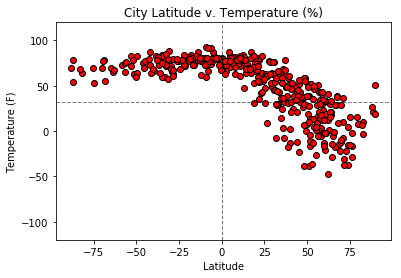

In [147]:
# Chart 1: Temperature (F) vs. Latitude

plt.scatter(temp_df["Latitude"],temp_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude v. Temperature (%)")
plt.xlabel("Latitude") 
plt.ylabel("Temperature (F)") 
plt.ylim((-120, 120))
plt.axhline(y=32, linestyle='--', linewidth = 1, color = "black", alpha=.50)
plt.axvline(x=0, linestyle = "--", linewidth = 1, color = "black", alpha = .50)
plt.savefig("Lat_vs_Temp.png")
# plt.grid(alpha=.50)
plt.show()

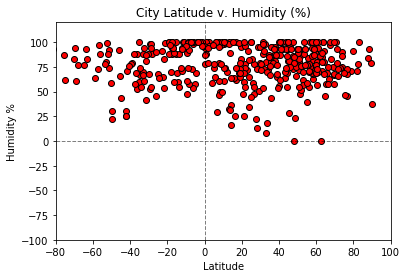

In [148]:
# Chart 2: Humidity (%) vs. Latitude

plt.scatter(humidity_df["Latitude"], humidity_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude v. Humidity (%)")
plt.xlabel("Latitude")  
plt.ylabel("Humidity %")
plt.ylim((-100, 120))
plt.xlim((-80, 100))
plt.axhline(y=0, linestyle='--', linewidth = 1, color = "black", alpha=.50)
plt.axvline(x=0, linestyle = "--", linewidth = 1, color = "black", alpha = .50)
plt.savefig("Lat_vs_Hum.png")
plt.grid=True
plt.show()

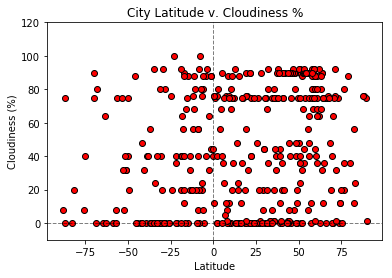

In [149]:
# Chart 3: Cloudiness (%) vs. Latitude

plt.scatter(clouds_df["Latitude"],clouds_df["Clouds"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude v. Cloudiness %")
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)") 
plt.ylim((-10, 120))
plt.axhline(y=0, linestyle='--', linewidth = 1, color = "black", alpha=.50)
plt.axvline(x=0, linestyle = "--", linewidth = 1, color = "black", alpha = .50)
plt.savefig("Lat_vs_Cloud.png")
# plt.grid(alpha=.50)
plt.show()


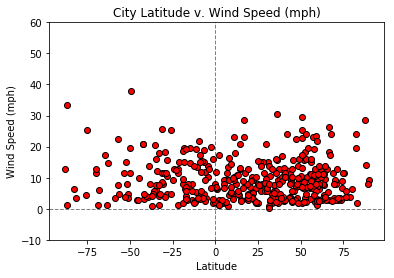

In [150]:
# Chart 4: Wind Speed (mph) vs. Latitude

plt.scatter(wind_df["Latitude"],wind_df["Wind"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude v. Wind Speed (mph)")
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (mph)") 
plt.ylim((-10, 60))
plt.axhline(y=0, linestyle='--', linewidth = 1, color = "black", alpha=.50)
plt.axvline(x=0, linestyle = "--", linewidth = 1, color = "black", alpha = .50)
plt.savefig("Lat_vs_WindSpeed.png")
# plt.grid(alpha=.50)
plt.show()